In [31]:
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px



Hej Debatten,

Her er lidt data på vores So-Me.

Data består af samtlige klip fra denne sæson lagt på Facebook. Jeg har talt likes, kommentarer, tid i sekunder, delinger, gæsttype og køn. Twitter er ikke med. Det kan være, det ser anderledes ud der.

Gæsttypen er lidt arbitrær. Jeg har følgende kategorier:
1) Ekspert
2) Case
3) Politiker
4) Pro-debber
5) Partskilde

Jeg har i øvrigt fjernet Abelone fra datasættet, da hun med 500.000 visninger var en kæmpe outlier og trak datasættet helt skævt.


Vi starter lige med lidt oprydning.

In [16]:
df = pd.read_csv('deb_tal.csv', sep=';', header = 1)

Her er lidt overordnet statistik om variablerne.

In [63]:
df.describe()

,Views,Likes,Kommentarer,Tid,Delinger,Gtype
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,17363.709091,204.836364,180.981818,62.490909,20.327273,3.181818
std,5521.755141,121.203802,116.891607,15.473840,29.056175,1.156158
min,8599.000000,24.000000,31.000000,32.000000,0.000000,1.000000
25%,13144.500000,119.000000,96.000000,52.000000,5.000000,3.000000
50%,17228.000000,175.000000,144.000000,59.000000,11.000000,3.000000
75%,21524.000000,266.000000,230.500000,73.000000,19.000000,4.000000
max,29135.000000,524.000000,477.000000,95.000000,165.000000,5.000000


Vi har 17.000 visninger i gennemsnit pr. video med 29.135 som bedste, hvis man ikke tæller Abelone med.

Vi kan starte med at se på kønsfordelingen for vores So-Me-klip.

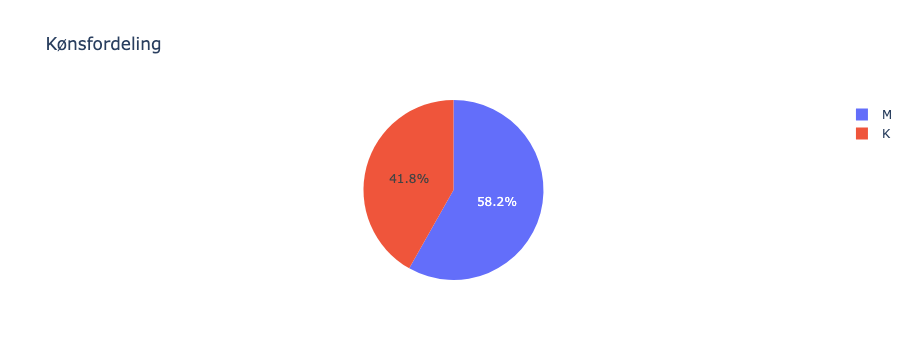

In [118]:
gender_counts = df['Køn'].value_counts()

fig = px.pie(names=gender_counts.index, values=gender_counts.values, title='Kønsfordeling')

fig.show()

Det ser meget fornuftigt ud. Særligt taget i betragtning, at vi mangler Abelone, som ville have trukket det op på ca. 45-55%.

Lad os prøve at se, om der er forskel på, hvordan de forskellige gæsttyper performer

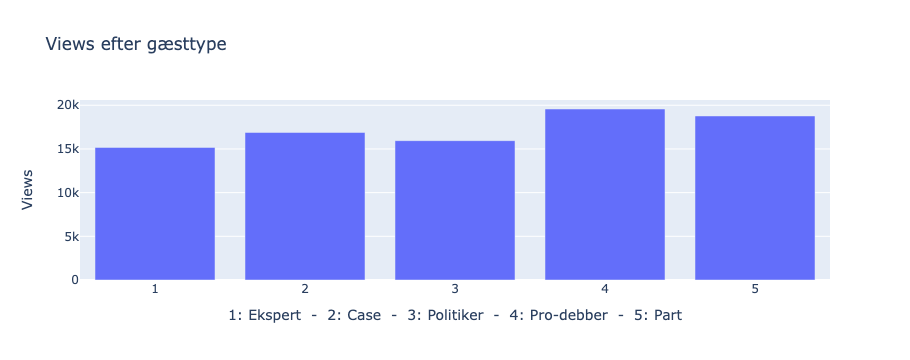

In [120]:
df_gtype = df.groupby('Gtype')['Views'].mean().reset_index()
fig = px.bar(df_gtype, x='Gtype', y='Views', title='Views efter gæsttype')

fig.update_xaxes(title_text='1: Ekspert  -  2: Case  -  3: Politiker  -  4: Pro-debber  -  5: Part')

fig.show()

Ikke den store forskel på gæsttypernes performance. Pro-debberne klarer sig lidt bedre. Politikerne lidt dårligere. Måske tilstrækkeligt til, at det er statistisk signifikant, men ærlig talt ikke nok til, at det er værd at gøre et nummer ud af.

Lad os gå videre og se, hvordan kønnene performer?

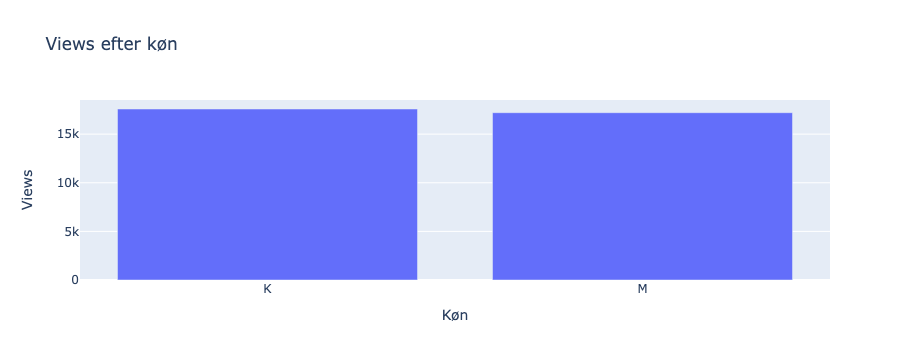

In [39]:
df_koen = df.groupby('Køn')['Views'].mean().reset_index()
px.bar(df_koen, x='Køn', y='Views', title = 'Views efter køn')

Heller ingen nævneværdig forskel.

Lad os for sjov se, hvad der bedst forklarer flere visninger. Er det likes, kommentarer eller delinger?

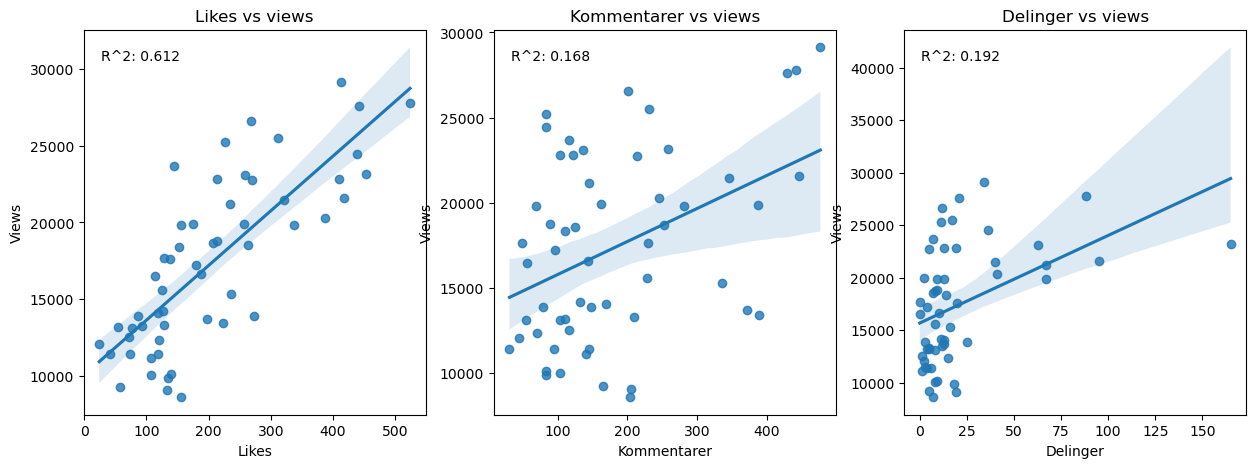

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Likes
sns.regplot(data=df, x='Likes', y='Views', ax=axs[0])
axs[0].set_title('Likes vs views')

axs[0].text(0.05, 0.95, 'R^2: 0.612', transform=axs[0].transAxes, ha='left', va='top')


# Kommentarer
sns.regplot(data=df, x='Kommentarer', y='Views', ax=axs[1])
axs[1].set_title('Kommentarer vs views')

axs[1].text(0.05, 0.95, 'R^2: 0.168', transform=axs[1].transAxes, ha='left', va='top')

# Delinger
sns.regplot(data=df, x='Delinger', y='Views', ax=axs[2])
axs[2].set_title('Delinger vs views')

axs[2].text(0.05, 0.95, 'R^2: 0.192', transform=axs[2].transAxes, ha='left', va='top')


plt.show()

Likes betyder suverænt mest. Jeg forestiller mig, at kommentarer ikke fylder så meget, fordi vi ofte har diskussioner mellem eksempelvis to brugere, der hurtigt kan smide 30-50 kommentarer. Jeg er overrasket over, at delinger ikke betyder specielt meget.

Nå, videre til videolængdens betydning for visninger? 

Text(0.5, 1.0, 'Tid i sekunder vs views')

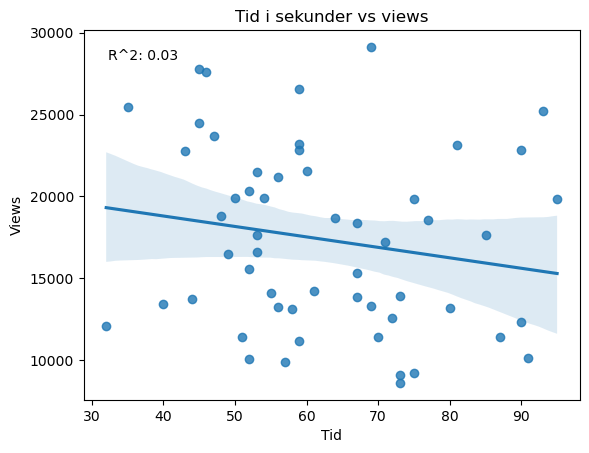

In [105]:
fig2 = sns.regplot(df, x='Tid', y='Views')
fig2.text(0.05, 0.95, 'R^2: 0.03', transform=fig2.transAxes, ha='left', va='top')
fig2.set_title('Tid i sekunder vs views')

Der er absolut ingen effekt. 

Det var, hvad jeg har set på.

Jeg synes, den overordnede konklusion er, at formelle kriterier ikke har den store betydning for, hvordan vi performer på Facebook. Der er ikke forskel på køn, gæsttype eller videolængde. 

Det er jo i og for sig betryggende for publicister som os, fordi det betyder, at det afgørende er indholdet. 

Det betyder også, at vi kan stoppe med at spekulere over den rette videolængde og den slags tid. Den vigtigste beslutninger, der bliver taget er klart, hvor vi lægger snittet i de enkelte klip. 

Det hernede er bare beregninger

In [93]:
model = LinearRegression()
model.fit(df[['Likes']], df['Views'])


r_squared = model.score(df[['Likes']], df['Views'])
print("R-squared:", r_squared)

R-squared: 0.6123380597447444


In [94]:
model = LinearRegression()
model.fit(df[['Kommentarer']], df['Views'])

r_squared_2 = model.score(df[['Kommentarer']], df['Views'])
print("R-squared:", r_squared_2)

R-squared: 0.16817256011816906


In [95]:


model = LinearRegression()
model.fit(df[['Delinger']], df['Views'])

r_squared_3 = model.score(df[['Delinger']], df['Views'])
print("R-squared:", r_squared_3)

R-squared: 0.1926871500803503


In [106]:
model = LinearRegression()
model.fit(df[['Tid']], df['Views'])

r_squared_4 = model.score(df[['Tid']], df['Views'])
print("R-squared:", r_squared_4)

R-squared: 0.032052209784061425
